In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again
import warnings
warnings.filterwarnings('ignore')

# Will focus on getting the test accuracies rather than training


In [2]:
df = pd.read_csv(r"C:\Users\Varada\Desktop\PCOS_Dataset.csv")
                 #xlsx and then encoding=utf-8 will also work
df.head(7)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,6,6,0,36,74.1,165.0,27.2,15,78,28,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,7,7,0,34,64.0,156.0,26.3,11,72,18,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8


In [3]:
#counting the number of rows and columns in the datat set
df.shape

(541, 44)

In [4]:
#count number of empty vales in each column

df = df.fillna(df.median())
df.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [5]:
#feature engineering
#converting categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,0,28,44.6,152.000,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,1,0,36,65.0,161.500,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,2,1,33,68.8,165.000,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,3,0,37,65.0,148.000,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,4,0,25,52.0,161.000,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,536,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,537,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,538,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,539,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [6]:
df=df.drop('Sl. No', axis=1)
df=df.drop('Patient File No.', axis=1)
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [7]:
#getting the number of People who went to the ICU
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

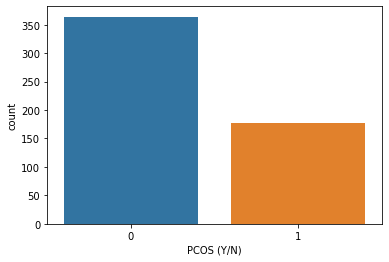

In [8]:
#visualise the count we would be needing a seaborn library
sns.countplot(df['PCOS (Y/N)'],label='count')

# Feature selection


<function matplotlib.pyplot.show(close=None, block=None)>

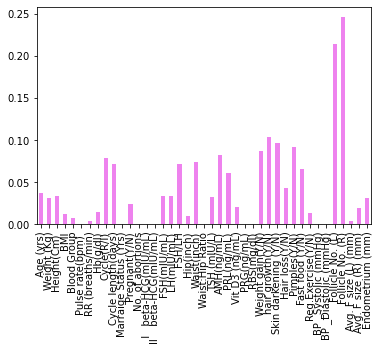

In [9]:
#feature selection with information gain
#df5 without balancing
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

X=df.drop(labels=['PCOS (Y/N)'], axis=1)
Y=df['PCOS (Y/N)']

mutual_info=mutual_info_classif(X,Y)
mutual_info=pd.Series(mutual_info,X.columns[0:len(X.columns)])
mutual_info.plot(kind='bar',color='violet')
plt.show

<AxesSubplot:>

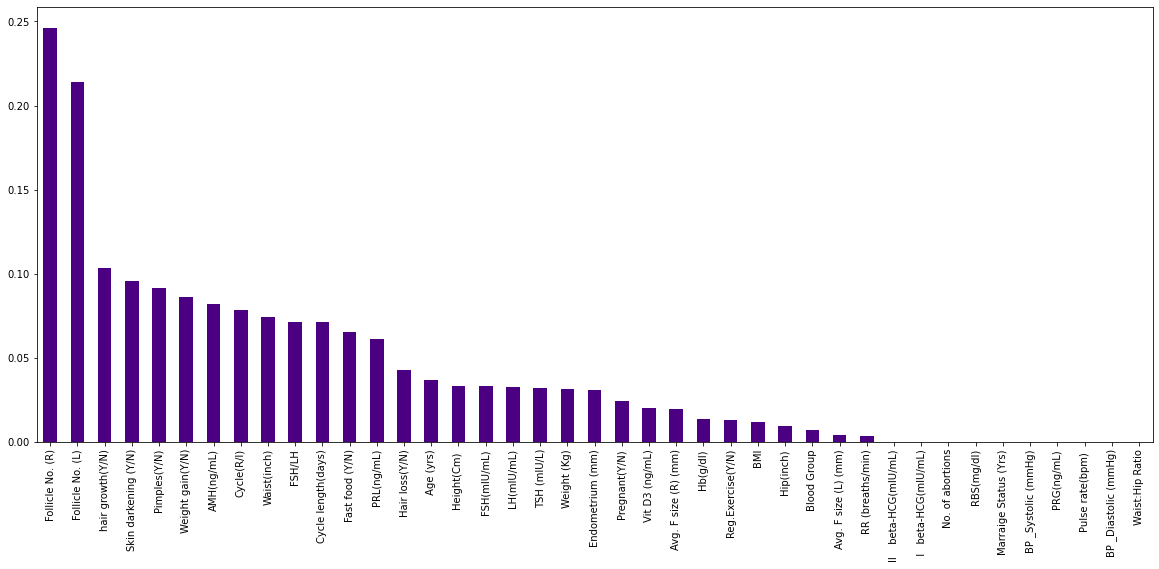

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='indigo')

In [11]:
conserve=df[['Follicle No. (L)','Follicle No. (R)','Skin darkening (Y/N)','Fast food (Y/N)','hair growth(Y/N)','Cycle(R/I)','FSH/LH','Cycle length(days)','Weight gain(Y/N)','AMH(ng/mL)','PRL(ng/mL)','Pimples(Y/N)','BP _Systolic (mmHg)','Waist(inch)',' Age (yrs)','PCOS (Y/N)']]

df=conserve
df

,Follicle No. (L),Follicle No. (R),Skin darkening (Y/N),Fast food (Y/N),hair growth(Y/N),Cycle(R/I),FSH/LH,Cycle length(days),Weight gain(Y/N),AMH(ng/mL),PRL(ng/mL),Pimples(Y/N),BP _Systolic (mmHg),Waist(inch),Age (yrs),PCOS (Y/N)
0,3,3,0,1.0,0,2,2.16,5,0,2.07,45.16,0,110,30,28,0
1,3,5,0,0.0,0,2,6.17,5,0,1.53,20.09,0,120,32,36,0
2,13,15,0,1.0,0,2,6.30,5,0,6.63,10.52,1,120,36,33,1
3,2,2,0,0.0,0,2,3.42,5,0,1.22,36.90,0,120,36,37,0
4,3,4,0,0.0,0,2,4.42,5,0,2.26,30.09,0,120,30,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1,0,0,0.0,0,2,5.56,5,0,1.70,5.30,0,110,26,35,0
537,9,7,0,0.0,0,2,1.79,5,1,5.60,21.09,0,110,32,30,0
538,1,0,0,0.0,0,2,4.30,6,0,3.70,96.41,0,110,28,36,0
539,7,6,0,0.0,0,4,1.02,2,0,5.20,38.89,1,110,26,27,0


# Logistic Regression

In [12]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression

df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
#oversample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_


Fitting 3 folds for each of 14 candidates, totalling 42 fits


{'C': 1000, 'penalty': 'l2'}

[[109  11]
 [  9  90]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       120
         1.0       0.89      0.91      0.90        99

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



accuracy 0.91
precision 0.89
recall 0.91
AUC: 0.96
Precision-Recall: 0.95


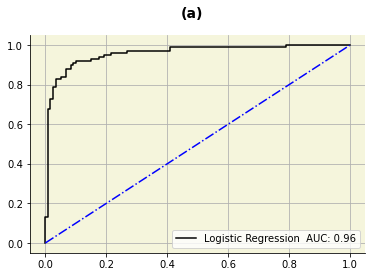

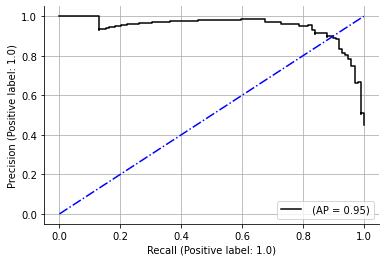

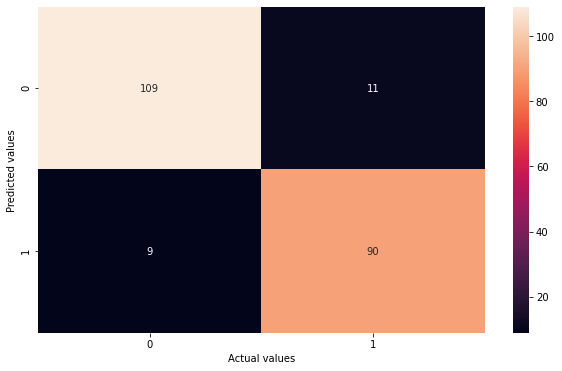

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Logistic regression", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lrClassifier, x_test, y_test,color='xkcd:black', name = '')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve logistic regression", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')
    

# Decision Tree

In [14]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']


oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)



#parameters
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_split' : range(10,500,20),
    'splitter' : ['best', 'random'],
    'min_samples_leaf': [1,5,8,11],
    'max_features': ['log2', 'sqrt','auto']
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

dtClassifier.fit(x_train, y_train)
dtClassifier.best_params_

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits


{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

[[106  14]
 [ 13  86]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       120
         1.0       0.86      0.87      0.86        99

    accuracy                           0.88       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.88      0.88      0.88       219



accuracy 0.88
precision 0.86
recall 0.87
AUC: 0.92
Precision-Recall: 0.86


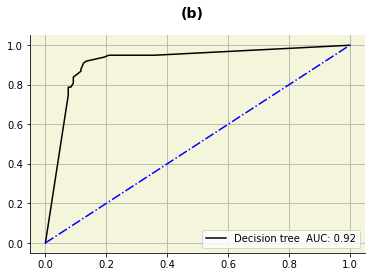

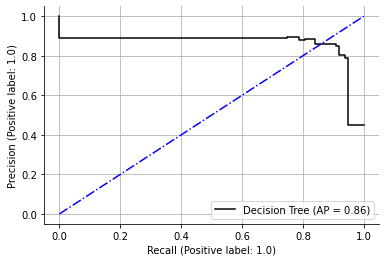

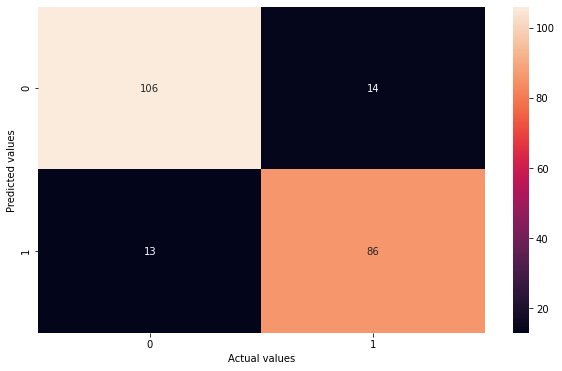

In [15]:
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(b)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Decision Tree')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Decision Tree", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')
    

# Random Forest

In [33]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)




from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_



Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

[[112   8]
 [  5  94]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       120
         1.0       0.92      0.95      0.94        99

    accuracy                           0.94       219
   macro avg       0.94      0.94      0.94       219
weighted avg       0.94      0.94      0.94       219



accuracy 0.94
precision 0.92
recall 0.95
AUC: 0.99
Precision-Recall: 0.99


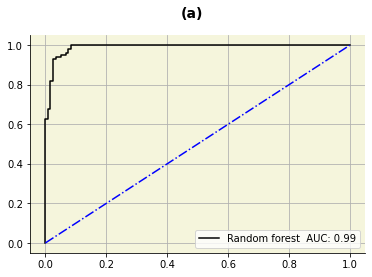

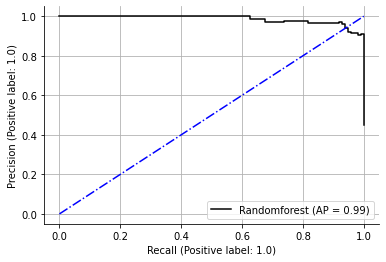

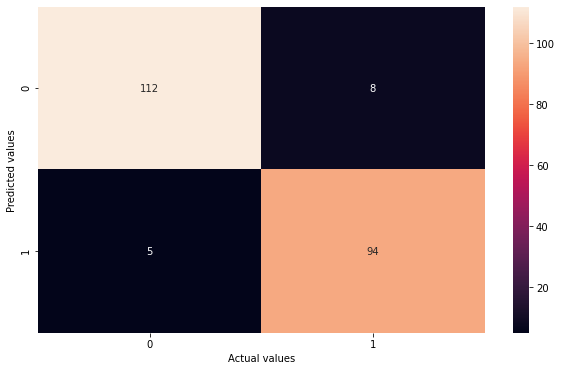

In [34]:
y_pred = rfclassifier.predict(x_test)
y_proba = rfclassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# RandomForest summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
fig.suptitle('(a)', fontsize=14, fontweight='bold')
plot_precision_recall_curve(rfclassifier, x_test, y_test,color='xkcd:black', name = 'Randomforest')
fig.suptitle('(a)', fontsize=14, fontweight='bold')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')
    


# SVM Linear

[[109  11]
 [  2  97]]
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       120
         1.0       0.90      0.98      0.94        99

    accuracy                           0.94       219
   macro avg       0.94      0.94      0.94       219
weighted avg       0.94      0.94      0.94       219



accuracy 0.94
precision 0.9
recall 0.98
AUC: 0.97
Precision-Recall: 0.96


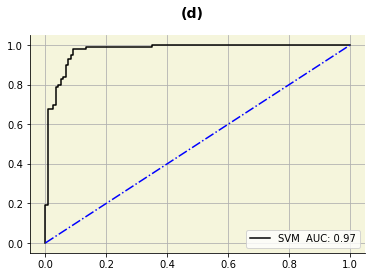

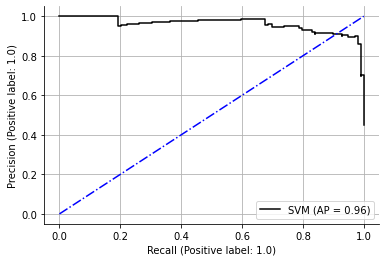

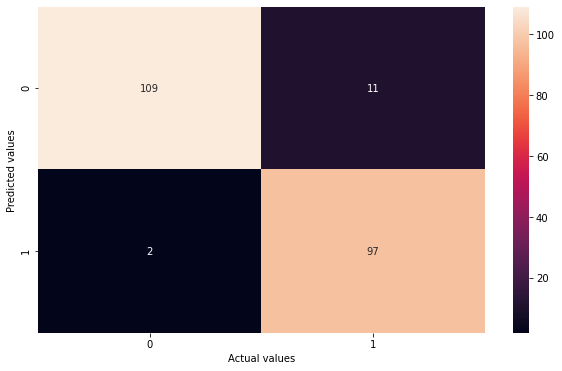

In [18]:
from sklearn import svm

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create a based model
clf = svm.SVC(kernel='linear',probability=True)

clf.fit(x_train, y_train)



y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    



# SVM Polynomial

[[109  11]
 [  1  98]]
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       120
         1.0       0.90      0.99      0.94        99

    accuracy                           0.95       219
   macro avg       0.94      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219



accuracy 0.95
precision 0.9
recall 0.99
AUC: 0.98
Precision-Recall: 0.93


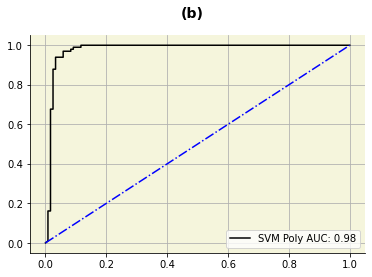

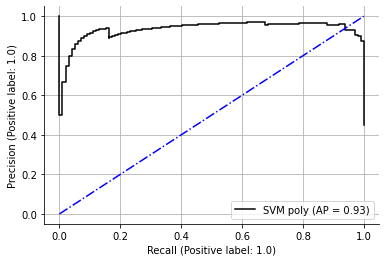

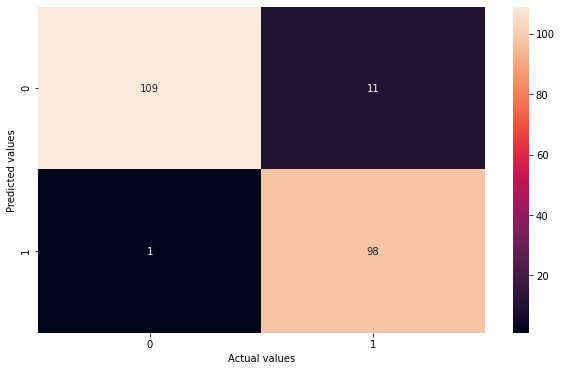

In [19]:
from sklearn import svm

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create a based model
svmclassifier = svm.SVC(kernel='poly',probability=True)

svmclassifier.fit(x_train, y_train)



y_pred = svmclassifier.predict(x_test)
y_proba =svmclassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(b)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM Poly AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM-poly", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svmclassifier, x_test, y_test,color='xkcd:black', name = 'SVM poly')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM", dpi=800,bbox_inches = 'tight')
    



# SVM Gaussian

[[110  10]
 [  2  97]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       120
         1.0       0.91      0.98      0.94        99

    accuracy                           0.95       219
   macro avg       0.94      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219



accuracy 0.95
precision 0.91
recall 0.98
AUC: 0.98
Precision-Recall: 0.98


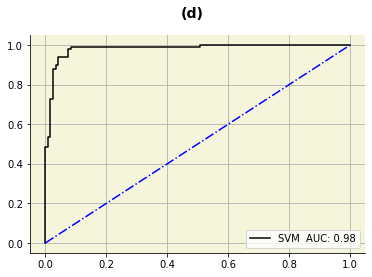

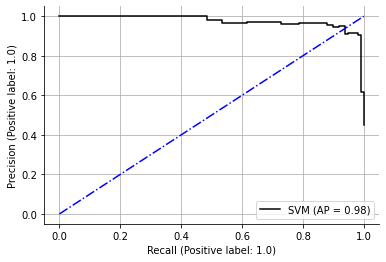

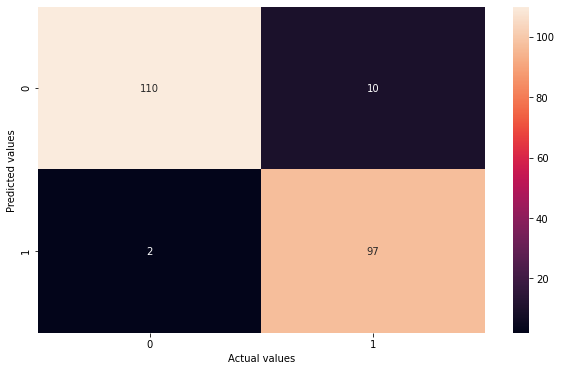

In [20]:
# from sklearn import svm

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create a based model
svmclassifier1 = svm.SVC(kernel='rbf',probability=True)

svmclassifier1.fit(x_train, y_train)



y_pred = svmclassifier1.predict(x_test)
y_proba =svmclassifier1.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM-poly", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svmclassifier1, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM-poly", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM-poly", dpi=800,bbox_inches = 'tight')
    



# SVM Sigmoid

[[106  14]
 [  7  92]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       120
         1.0       0.87      0.93      0.90        99

    accuracy                           0.90       219
   macro avg       0.90      0.91      0.90       219
weighted avg       0.91      0.90      0.90       219



accuracy 0.9
precision 0.87
recall 0.93
AUC: 0.96
Precision-Recall: 0.95


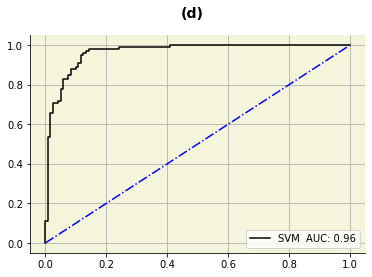

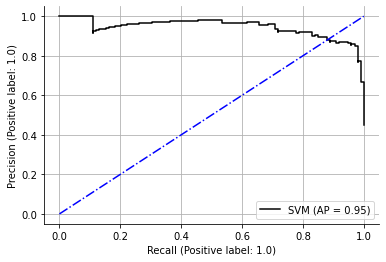

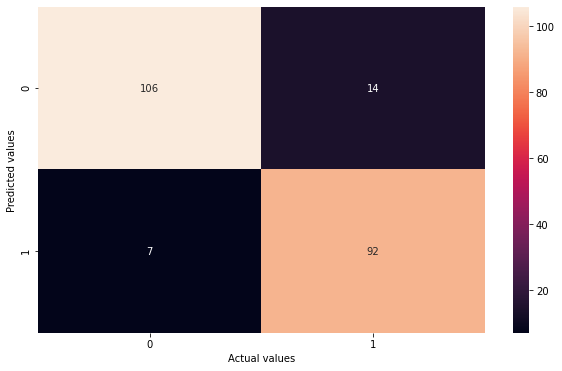

In [21]:
from sklearn import svm

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create a based model
svmclassifier2 = svm.SVC(kernel='sigmoid',probability=True)

svmclassifier2.fit(x_train, y_train)



y_pred = svmclassifier2.predict(x_test)
y_proba =svmclassifier2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='SVM  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC SVM-sigmoid", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svmclassifier2, x_test, y_test,color='xkcd:black', name = 'SVM')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve SVM sigmoid", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix SVM sigmoid", dpi=800,bbox_inches = 'tight')
    



# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


#Create a Gaussian Classifier
modelGaussian = GaussianNB()

# Train the model using the training sets
nb=modelGaussian.fit(x_train,y_train)


[[108  12]
 [ 11  88]]
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       120
         1.0       0.88      0.89      0.88        99

    accuracy                           0.89       219
   macro avg       0.89      0.89      0.89       219
weighted avg       0.90      0.89      0.90       219



accuracy 0.89
precision 0.88
recall 0.89
AUC: 0.95
Precision-Recall: 0.9


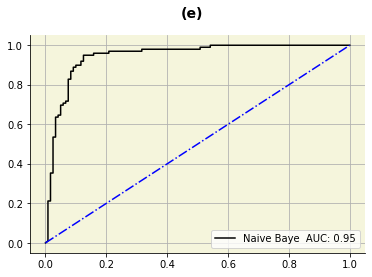

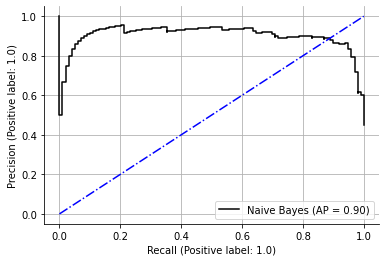

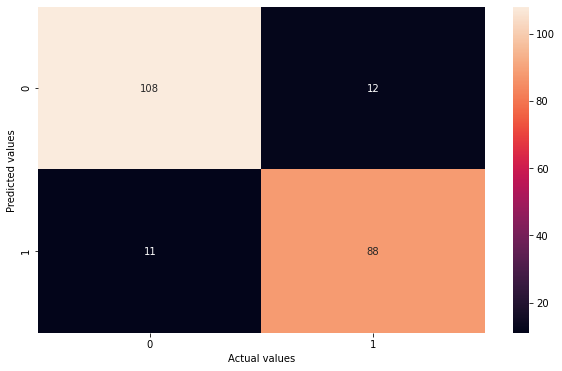

In [23]:
y_pred = nb.predict(x_test)
y_proba = nb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Naive Baye  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Naive Bayes", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(nb, x_test, y_test,color='xkcd:black', name = 'Naive Bayes')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Naive Bayes", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Naive Bayes", dpi=800,bbox_inches = 'tight')
    

# KNN

Fitting 3 folds for each of 99 candidates, totalling 297 fits
[[109  11]
 [ 10  89]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       120
         1.0       0.89      0.90      0.89        99

    accuracy                           0.90       219
   macro avg       0.90      0.90      0.90       219
weighted avg       0.90      0.90      0.90       219



accuracy 0.9
precision 0.89
recall 0.9
AUC: 0.95
Precision-Recall: 0.94


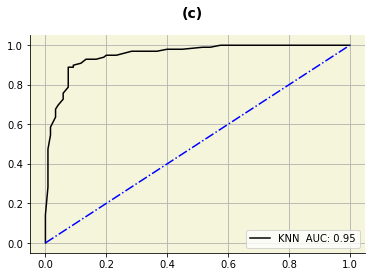

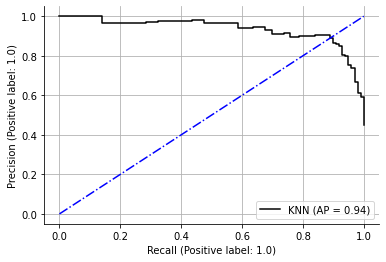

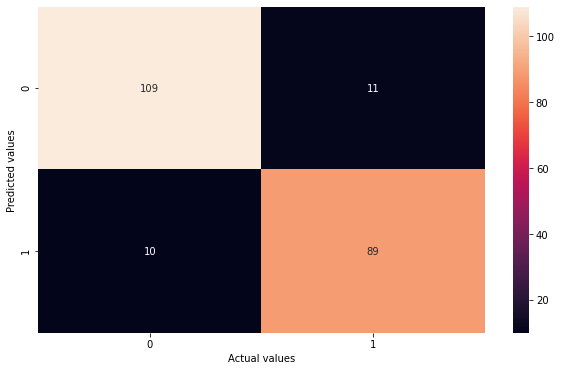

In [24]:
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_



y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knnClassifier, x_test, y_test,color='xkcd:black', name = 'KNN')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR KNN", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')
    


# Ensemble Tree Based Algo

# Adaboost

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[[108  12]
 [  5  94]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       120
         1.0       0.89      0.95      0.92        99

    accuracy                           0.92       219
   macro avg       0.92      0.92      0.92       219
weighted avg       0.92      0.92      0.92       219



accuracy 0.92
precision 0.89
recall 0.95
AUC: 0.98
Precision-Recall: 0.96


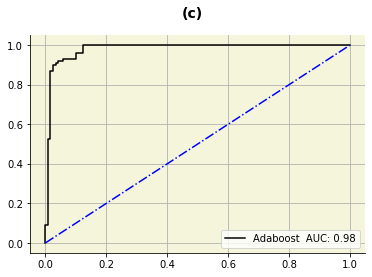

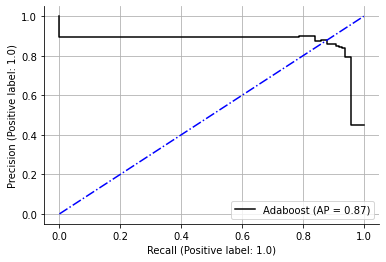

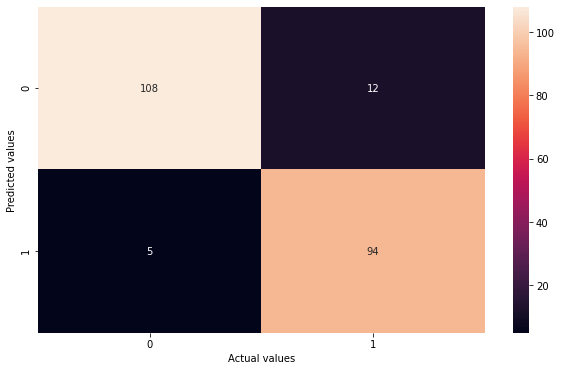

In [25]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

# Create a based model
ad = AdaBoostClassifier()
# Instantiate the grid search model
grid_searchAdaBoostClassifier = GridSearchCV(estimator = ad, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchAdaBoostClassifier.fit(x_train, y_train)
grid_searchAdaBoostClassifier.best_params_

y_pred = grid_searchAdaBoostClassifier.predict(x_test)
y_proba = grid_searchAdaBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Adaboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Adaboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dtClassifier, x_test, y_test,color='xkcd:black', name = 'Adaboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Adaboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Adaboost", dpi=800,bbox_inches = 'tight')
    


# XGBoost Classification


Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[[111   9]
 [  3  96]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       120
         1.0       0.91      0.97      0.94        99

    accuracy                           0.95       219
   macro avg       0.94      0.95      0.94       219
weighted avg       0.95      0.95      0.95       219



accuracy 0.95
precision 0.91
recall 0.97
AUC: 0.99
Precision-Recall: 0.99


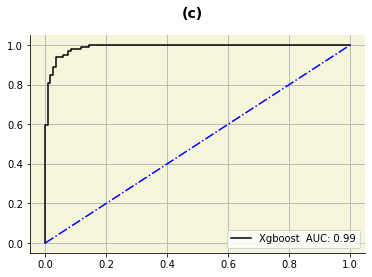

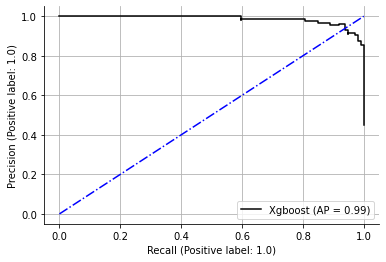

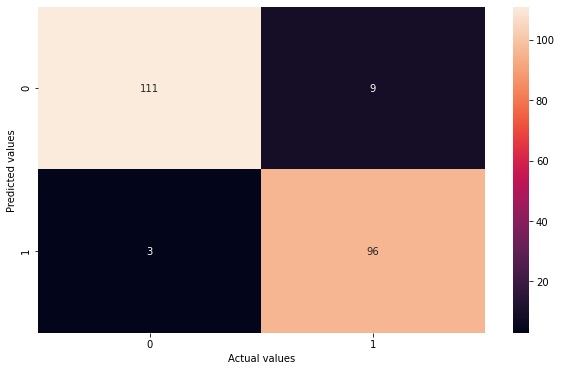

In [26]:
from xgboost import XGBClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
    "learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
             
        
             }

# Create a based model
lg = XGBClassifier()
# Instantiate the grid search model
xgb = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

xgb.fit(x_train, y_train)
xgb.best_params_




y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Xgboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Xgboost", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb, x_test, y_test,color='xkcd:black', name = 'Xgboost')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve xgboost", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Xgboost", dpi=800,bbox_inches = 'tight')
    


# Extratrees Classifier

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[[103  17]
 [  4  95]]
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91       120
         1.0       0.85      0.96      0.90        99

    accuracy                           0.90       219
   macro avg       0.91      0.91      0.90       219
weighted avg       0.91      0.90      0.90       219



accuracy 0.9
precision 0.85
recall 0.96
AUC: 0.96
Precision-Recall: 0.95


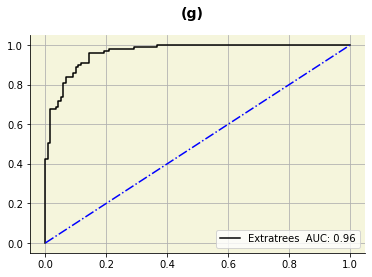

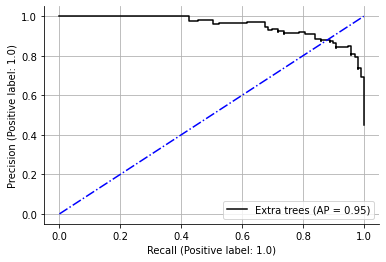

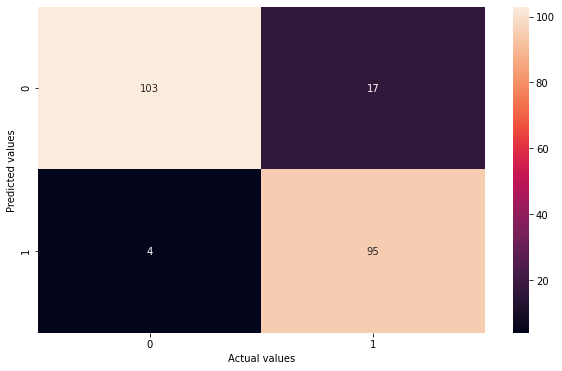

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
     'n_estimators': range(50,126,25),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
        
             }

# Create a based model
lg = ExtraTreesClassifier()
# Instantiate the grid search model
etc = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

etc.fit(x_train, y_train)
etc.best_params_






y_pred = etc.predict(x_test)
y_proba = etc.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(g)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Extratrees  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Extratrees", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(etc, x_test, y_test,color='xkcd:black', name = 'Extra trees')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("Extratrees pr curve random forest", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Extra Trees", dpi=800,bbox_inches = 'tight')
    

# Light GBM

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[[112   8]
 [  2  97]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       120
         1.0       0.92      0.98      0.95        99

    accuracy                           0.95       219
   macro avg       0.95      0.96      0.95       219
weighted avg       0.96      0.95      0.95       219



accuracy 0.95
precision 0.92
recall 0.98
AUC: 0.99
Precision-Recall: 0.99


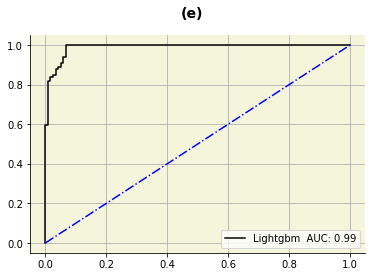

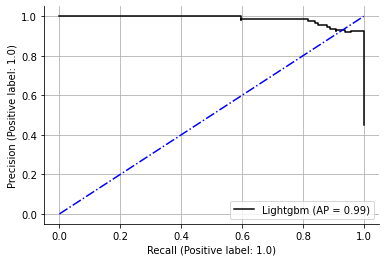

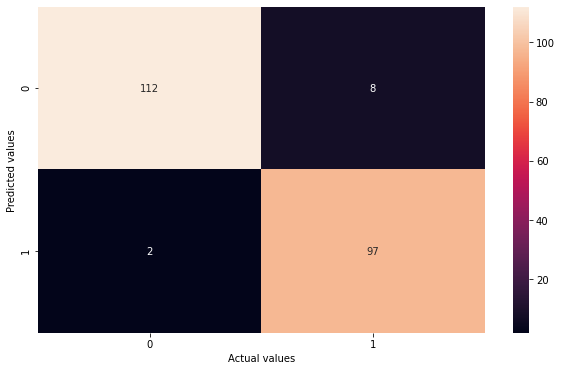

In [28]:
from lightgbm import LGBMClassifier

from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)

param_grid = {
     'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
             
        
             }

# Create a based model
lg =  LGBMClassifier()
# Instantiate the grid search model
lgm = GridSearchCV(estimator = lg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

lgm.fit(x_train, y_train)
lgm.best_params_




y_pred = lgm.predict(x_test)
y_proba = lgm.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ExtratreeClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Lightgbm  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Lightgbm", dpi=800,bbox_inches = 'tight')
    
plt.show()
    



#Precsiion Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lgm, x_test, y_test,color='xkcd:black', name = 'Lightgbm')



plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc=4)
plt.grid(True)

plt.savefig("PR curve Lightgbm", dpi=800,bbox_inches = 'tight')


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Lightgbm", dpi=800,bbox_inches = 'tight')
    


# Stacking (LR,SVMlin,SVMpoly,SVMrbf,SVMsig,NB,KNN) -1

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 99 candidates, totalling 297 fits
[[111   9]
 [  1  98]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       120
         1.0       0.92      0.99      0.95        99

    accuracy                           0.95       219
   macro avg       0.95      0.96      0.95       219
weighted avg       0.96      0.95      0.95       219



accuracy 0.95
precision 0.92
recall 0.99
AUC: 0.99
Precision-Recall: 0.98


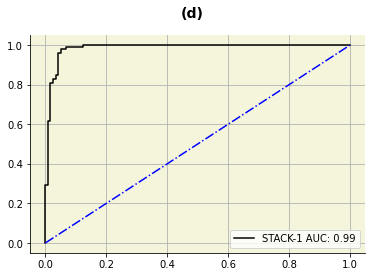

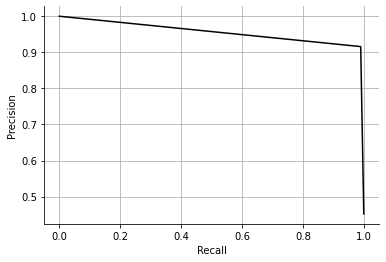

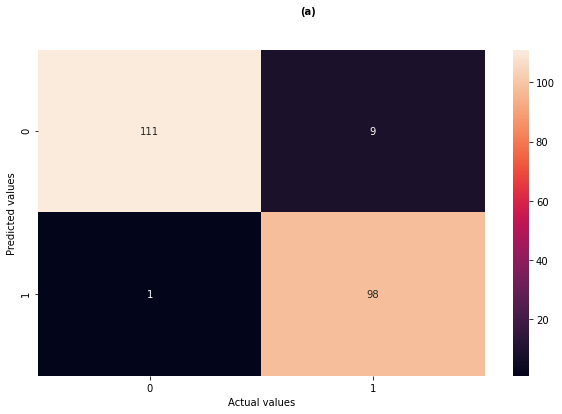

In [29]:
# Three models 
clf1 = lrClassifier
clf2 = clf
clf3 = svmclassifier 
clf4 = svmclassifier1
clf5 = svmclassifier2
clf6 = nb
clf7=knnClassifier

from mlxtend.classifier import StackingClassifier
# meta-classifier 
meta_clf = LogisticRegression(random_state=42)

# Stacking 
stack1 = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4 , clf5, clf6,clf7],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)


stack1.fit(x_train, y_train)
y_pred = stack1.predict(x_test)
y_proba = stack1.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='STACK-1 AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig("AUC STACKA", dpi=800,bbox_inches = 'tight')
    
plt.show()


#Precsiion Recall Curve

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR StackA", dpi=800,bbox_inches = 'tight')
plt.show()
    

cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(a)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix StackA", dpi=800,bbox_inches = 'tight')



# Stack 2

Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 120 candidates, totalling 360 fits
[[113   7]
 [  4  95]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       120
         1.0       0.93      0.96      0.95        99

    accuracy                           0.95       219
   macro avg       0.95      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219



accuracy 0.95
precision 0.93
recall 0.96
AUC: 0.99
Precision-Recall: 0.99


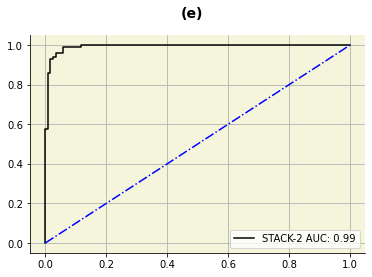

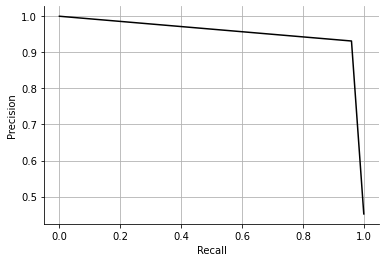

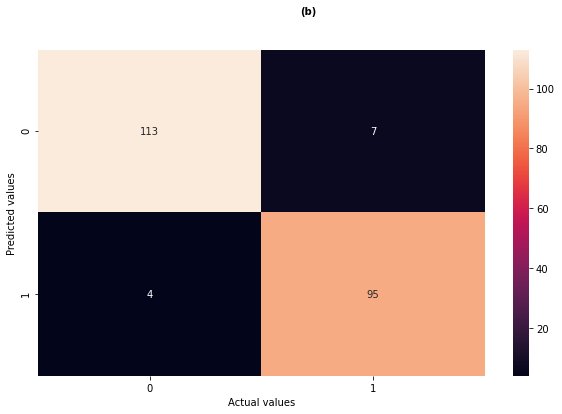

In [35]:
from mlxtend.classifier import StackingClassifier
clf1 = dtClassifier
clf2 = rf
clf3 = grid_searchAdaBoostClassifier
#gradient
#clf4 = lgm
clf5= xgb
clf6= etc


# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack2 = StackingClassifier(classifiers=[clf1, clf2, clf3,clf5,clf6],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)

stack2.fit(x_train, y_train)
y_pred = stack2.predict(x_test)
y_proba = stack2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))


fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='STACK-2 AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC StackB", dpi=800,bbox_inches = 'tight')
    
plt.show()


#Precsiion Recall Curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR StackB", dpi=800,bbox_inches = 'tight')
plt.show()
    


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(b)', fontsize=10,fontweight='bold')
plt.savefig("Confusion matrix StackB", dpi=800,bbox_inches = 'tight')
        


# Final Stack

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 99 candidates, totalling 297 fits
Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 120 candidates, totalling 360 fits
[[114   6]
 [  3  96]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       120
         1.0       0.94      0.97      0.96        99

    accuracy                           0.96       219
   macro avg       0.96      0.96      0.96       219
weighted avg       0.96      0.96      0.96       219



accuracy 0.96
precision 0.94
recall 0.97
AUC: 0.99
Precision-Recall: 0.98


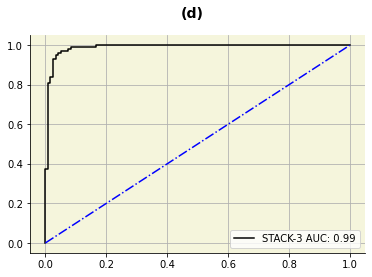

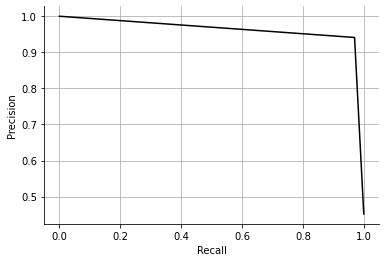

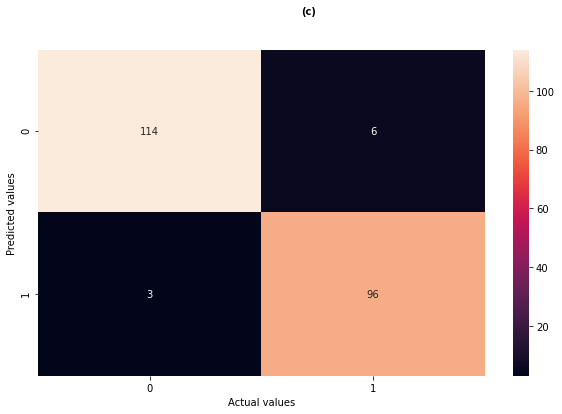

In [36]:
from mlxtend.classifier import StackingClassifier
clf1 = stack1
clf2 = stack2


# meta-classifier 
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking 
stack3 = StackingClassifier(classifiers=[clf1, clf2],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)


stack3.fit(x_train, y_train)
y_pred = stack3.predict(x_test)
y_proba = stack3.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='STACK-3 AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("StackC Xgboost", dpi=800,bbox_inches = 'tight')
    
plt.show()


#Precsiion Recall Curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR StackC", dpi=800,bbox_inches = 'tight')
plt.show()
    

#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(c)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix Stack3", dpi=800,bbox_inches = 'tight')
    


# Shap

In [ ]:
ippppp
mport shap
maple
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=25)
#plt.savefig("BeeSwarm1.png", dpi=100,bbox_inches = 'tight')

In [ ]:
# Average feature contribution
plt.title('Feature Contribution According to Value')

fig=shap.summary_plot(shap_values, x_train, plot_type="bar")
#plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight'

# LIME

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    
    feature_names=x_train.columns,
    mode='classification'
)

PCOS patient prediction

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[12], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

Normal patient pediction

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[1], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

# ANN Implemtation

In [37]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset = df

In [38]:
df = pd.read_csv(r"C:\Users\Varada\Desktop\PCOS_Dataset.csv")
                 #xlsx and then encoding=utf-8 will also work
df.head(7)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,6,6,0,36,74.1,165.0,27.2,15,78,28,...,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,7,7,0,34,64.0,156.0,26.3,11,72,18,...,0,0.0,0,120,80,6,6,15.0,16.0,6.8


In [39]:
df.isna().sum()
df = df.fillna(df.median())
df.isna().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [40]:
#feature engineering
#converting categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,0,28,44.6,152.000,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,1,0,36,65.0,161.500,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,2,1,33,68.8,165.000,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,3,0,37,65.0,148.000,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,4,0,25,52.0,161.000,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,536,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,537,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,538,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,539,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [41]:
df=df.drop('Sl. No', axis=1)
df=df.drop('Patient File No.', axis=1)
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


<function matplotlib.pyplot.show(close=None, block=None)>

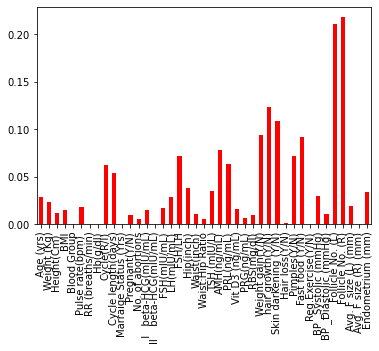

In [42]:
#feature selection with information gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

X=df.drop(labels=['PCOS (Y/N)'], axis=1)
Y=df['PCOS (Y/N)']

mutual_info=mutual_info_classif(X,Y)
mutual_info=pd.Series(mutual_info,X.columns[0:len(X.columns)])
mutual_info.plot(kind='bar',color='red')
plt.show

<AxesSubplot:>

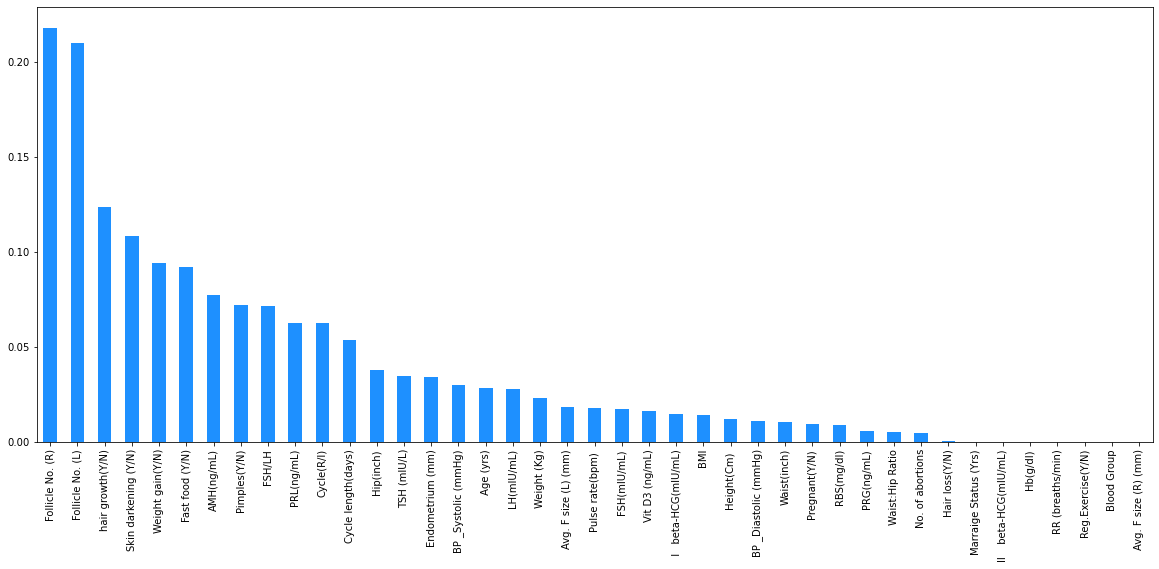

In [43]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='dodgerblue')

In [44]:
conserve=df[['Follicle No. (L)','Follicle No. (R)','Skin darkening (Y/N)','Fast food (Y/N)','hair growth(Y/N)','Cycle(R/I)','FSH/LH','Cycle length(days)','Weight gain(Y/N)','AMH(ng/mL)','PRL(ng/mL)','Pimples(Y/N)','BP _Systolic (mmHg)','Waist(inch)',' Age (yrs)','PCOS (Y/N)']]
df=conserve

In [45]:
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

oversample = BorderlineSMOTE()
#oversample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = oversample.fit_resample(x, y)

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)
#x_train1,x_test1,y_train,y_test = train_test_split(,y, test_size = 0.3, random_state = 1)


# ANN Creation

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout
#PReLu not possible

In [47]:
#initializing the ANN
classifier= Sequential()

In [48]:
## adding the input layer
#add all the inputs as the shape 
classifier.add(Dense(units= 19 , activation='relu'))

#adding the First hidden layer
# maybe some of the original neurons not all
classifier.add(Dense(units=12 , activation='relu'))
classifier.add(Dropout(0.2))

#adding the Second hidden layer
# maybe some of the original neurons not all
classifier.add(Dense(units=9, activation='relu'))
classifier.add(Dropout(0.3))

#adding the third hidden layer
# maybe some of the original neurons not all
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#adding the fourth hidden layer
# maybe some of the original neurons not all
classifier.add(Dense(units=5 , activation='relu'))
classifier.add(Dropout(0.3))

#adding the fifth hidden layer
# maybe some of the original neurons not all
classifier.add(Dense(units=3 , activation='relu'))
classifier.add(Dropout(0.2))

#adding output
classifier.add(Dense(1, activation='sigmoid'))

In [49]:
classifier.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
#we should have an early stop if the accuracy is remaining the same
#Early stopping
import tensorflow as tf

#early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=20, verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [51]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=26,epochs=200)

Epoch 1/200
14/14 [==============================] - 3s 55ms/step - loss: 0.6851 - accuracy: 0.4985 - val_loss: 0.6909 - val_accuracy: 0.5774
Epoch 2/200
14/14 [==============================] - 0s 20ms/step - loss: 0.6841 - accuracy: 0.5455 - val_loss: 0.6860 - val_accuracy: 0.7440
Epoch 3/200
14/14 [==============================] - 0s 15ms/step - loss: 0.6731 - accuracy: 0.5894 - val_loss: 0.6772 - val_accuracy: 0.7798
Epoch 4/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.5982 - val_loss: 0.6648 - val_accuracy: 0.7976
Epoch 5/200
14/14 [==============================] - 0s 16ms/step - loss: 0.6674 - accuracy: 0.5836 - val_loss: 0.6502 - val_accuracy: 0.8155
Epoch 6/200
14/14 [==============================] - 0s 14ms/step - loss: 0.6556 - accuracy: 0.5982 - val_loss: 0.6333 - val_accuracy: 0.8333
Epoch 7/200
14/14 [==============================] - 0s 16ms/step - loss: 0.6583 - accuracy: 0.5894 - val_loss: 0.6169 - val_accuracy: 0.8690
Epoch 

14/14 [==============================] - 0s 15ms/step - loss: 0.4689 - accuracy: 0.8475 - val_loss: 0.4123 - val_accuracy: 0.8571
Epoch 59/200
14/14 [==============================] - 0s 14ms/step - loss: 0.4552 - accuracy: 0.8416 - val_loss: 0.4115 - val_accuracy: 0.8631
Epoch 60/200
14/14 [==============================] - 0s 10ms/step - loss: 0.4270 - accuracy: 0.8622 - val_loss: 0.4110 - val_accuracy: 0.8571
Epoch 61/200
14/14 [==============================] - 0s 16ms/step - loss: 0.4450 - accuracy: 0.8387 - val_loss: 0.4086 - val_accuracy: 0.8571
Epoch 62/200
14/14 [==============================] - 0s 19ms/step - loss: 0.4588 - accuracy: 0.8299 - val_loss: 0.4063 - val_accuracy: 0.8571
Epoch 63/200
14/14 [==============================] - 0s 13ms/step - loss: 0.3936 - accuracy: 0.8739 - val_loss: 0.4045 - val_accuracy: 0.8571
Epoch 64/200
14/14 [==============================] - 0s 14ms/step - loss: 0.4175 - accuracy: 0.8622 - val_loss: 0.4031 - val_accuracy: 0.8571
Epoch 65/200

14/14 [==============================] - 0s 20ms/step - loss: 0.2671 - accuracy: 0.9326 - val_loss: 0.4051 - val_accuracy: 0.8512
Epoch 116/200
14/14 [==============================] - 0s 21ms/step - loss: 0.2332 - accuracy: 0.9531 - val_loss: 0.4102 - val_accuracy: 0.8452
Epoch 117/200
14/14 [==============================] - 0s 19ms/step - loss: 0.2542 - accuracy: 0.9355 - val_loss: 0.4140 - val_accuracy: 0.8512
Epoch 118/200
14/14 [==============================] - 0s 14ms/step - loss: 0.2637 - accuracy: 0.9238 - val_loss: 0.4171 - val_accuracy: 0.8452
Epoch 119/200
14/14 [==============================] - 0s 19ms/step - loss: 0.2554 - accuracy: 0.9326 - val_loss: 0.4241 - val_accuracy: 0.8512
Epoch 120/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2285 - accuracy: 0.9560 - val_loss: 0.4318 - val_accuracy: 0.8571
Epoch 121/200
14/14 [==============================] - 0s 22ms/step - loss: 0.2657 - accuracy: 0.9179 - val_loss: 0.4334 - val_accuracy: 0.8631
Epoch 

14/14 [==============================] - 0s 17ms/step - loss: 0.1932 - accuracy: 0.9501 - val_loss: 0.6037 - val_accuracy: 0.8631
Epoch 173/200
14/14 [==============================] - 0s 13ms/step - loss: 0.2016 - accuracy: 0.9443 - val_loss: 0.6151 - val_accuracy: 0.8631
Epoch 174/200
14/14 [==============================] - 0s 13ms/step - loss: 0.1899 - accuracy: 0.9472 - val_loss: 0.6112 - val_accuracy: 0.8750
Epoch 175/200
14/14 [==============================] - 0s 21ms/step - loss: 0.1798 - accuracy: 0.9560 - val_loss: 0.5984 - val_accuracy: 0.8631
Epoch 176/200
14/14 [==============================] - 0s 20ms/step - loss: 0.1878 - accuracy: 0.9501 - val_loss: 0.6012 - val_accuracy: 0.8631
Epoch 177/200
14/14 [==============================] - 0s 19ms/step - loss: 0.1643 - accuracy: 0.9648 - val_loss: 0.6259 - val_accuracy: 0.8571
Epoch 178/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2039 - accuracy: 0.9443 - val_loss: 0.6492 - val_accuracy: 0.8571
Epoch 

In [52]:
#making prediction for evaluating the model
#prediction for the test data
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)


7/7 [==============================] - 1s 2ms/step


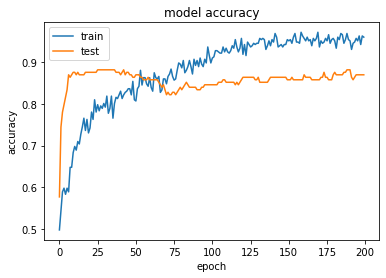

In [53]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

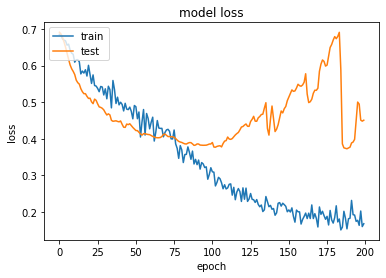

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [55]:
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       120
         1.0       0.83      0.96      0.89        99

    accuracy                           0.89       219
   macro avg       0.89      0.90      0.89       219
weighted avg       0.90      0.89      0.89       219



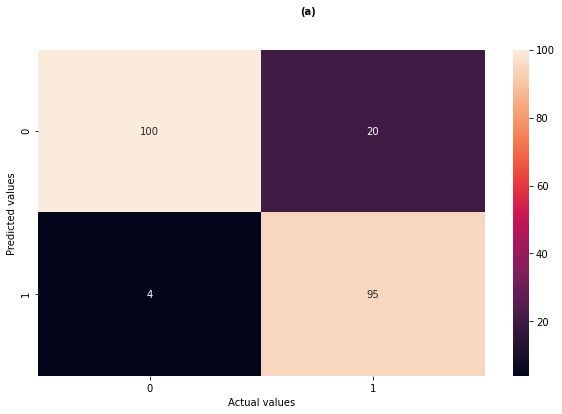

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
import seaborn as sns                 
cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.suptitle('(a)', fontsize=10,fontweight='bold')
plt.savefig("Confusion Matix StackA", dpi=800,bbox_inches = 'tight')



accuracy 0.89
precision 0.83
recall 0.96


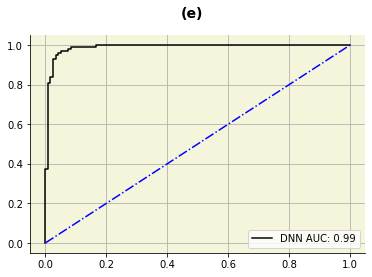

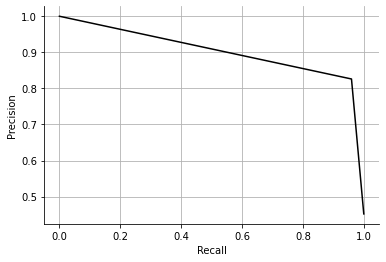

In [57]:

# StackingClassifier summary 
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)


fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(e)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='DNN AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
plt.show()


#Precsiion Recall Curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='black')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.show()
    


In [ ]:
ppppppppppppp

#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

# Explainable AI

In [ ]:
import shap
import numpy as np

model=tf.keras.Sequential([
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') ])


e = shap.KernelExplainer(model, x_train)
shap_values = e.shap_values(x_test)

In [ ]:
shap.initjs()
features=['Follicle No. (L)','Follicle No. (R)','Skin darkening (Y/N)','Fast food (Y/N)','hair growth(Y/N)','Cycle(R/I)','FSH/LH','Cycle length(days)','Weight gain(Y/N)','AMH(ng/mL)','PRL(ng/mL)','Pimples(Y/N)','BP _Systolic (mmHg)','Waist(inch)',' Age (yrs)']

# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)

In [ ]:
shap.summary_plot(shap_values[0], x_test, feature_names=features)

# 1D CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats as st

In [ ]:
df = pd.read_csv(r"C:\Users\Varada\Desktop\PCOS_Dataset.csv")
                 #xlsx and then encoding=utf-8 will also work
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',None)


In [ ]:
df = df.sample(frac = 1)  #Shuffle the rows

In [ ]:
df.shape

In [ ]:

#fillling empty values with median
#count number of empty vales in each column
df.isna().sum()
df = df.fillna(df.median())
df.isna().sum()

In [ ]:
#feature engineering
#converting categorical variables into numerical ones
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']


plt.figure(figsize = (12,8))
plt.pie(y.value_counts(), labels = ['Normal', 'PCOS'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Normal vs PCOS', fontsize=20)
plt.show()

#oversample = BorderlineSMOTE()
#x, y = oversample.fit_resample(x, y)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)


oversample = BorderlineSMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

y_train_tensor = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_tensor = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
y_test.shape

In [ ]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import tensorflow as tf
import keras

In [ ]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
print("X Train shape: ", x_train.shape)
print("X Test shape: ", x_test.shape)

In [ ]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (x_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

In [ ]:
cnn_model_history = cnn_model.fit(x_train, y_train_tensor, epochs=200, batch_size = 10, validation_data = (x_test, y_test_tensor))

In [ ]:
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [ ]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(['train','test'],loc='upper left')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = cnn_model.predict(x_test)

In [ ]:
 from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 #extract the predicted probabilities
 p_pred = cnn_model.predict(x_test)
 p_pred = p_pred.flatten()
 print(p_pred.round(2))

In [ ]:
 y_pred = np.where(p_pred > 0.5, 1, 0)
 print(y_pred)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:

cm=confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')

In [ ]:
y_pred_proba = cnn_model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred_proba)
score
